In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/tmp/ipykernel_33032/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# wczytanie bibliotek

In [41]:
%matplotlib inline
from datetime import datetime
from datetime import datetime, timedelta
import datetime as dt

import pandas as pd
import json
from datetime import datetime

from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#from prophet import Prophet

# połączenie z bazą

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade HASS-data-detective # We got to be sure that data detective is up to date

import detective.core as detective
import random

In [ ]:
#db_url_sqlite = "sqlite:///<<your path to database>>"
#db_url_postgre = "postgresql://SERVER_IP/DB_NAME"
##db = detective.HassDatabase(db_url)
##config_url = "<<your path to config/ folder>>"
db = detective.db_from_hass_config()

# zrzut danych do pliku csv

In [ ]:
numb = random.randrange(10000000)
df_sensors = db.fetch_all_sensor_data()
df_sensors.to_csv("home-assistant_sensors_"+ str(numb) + ".csv", index = False) # zapis pliku na dysku

In [ ]:
!pwd  # aktualny katalog

In [ ]:
!ls  # lista plików w katalogu

# wczytujemy dane z HA

In [42]:
# należy podać poprawną ścieżkę do pliku csv

df = pd.read_csv('home-assistant_sensors_' + str(numb) + '.csv', parse_dates=['last_changed'])
df.head()

,domain,entity_id,state,last_changed,attributes
0,sensor,sensor.sonoff_basic_uptime,271606,2022-03-11 22:29:46.772212,"{""state_class"":""total_increasing"",""unit_of_mea..."
1,sensor,sensor.front_detection_fps,10,2022-03-11 22:29:41.011811,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed..."
2,sensor,sensor.coral_inference_speed,11,2022-03-11 22:29:41.011642,"{""unit_of_measurement"":""ms"",""icon"":""mdi:speedo..."
3,sensor,sensor.detection_fps,10,2022-03-11 22:29:41.011411,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed..."
4,sensor,sensor.sonoff_s20_wifi_signal,-38,2022-03-11 22:29:40.194068,"{""state_class"":""measurement"",""unit_of_measurem..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   domain        50000 non-null  object        
 1   entity_id     50000 non-null  object        
 2   state         50000 non-null  object        
 3   last_changed  50000 non-null  datetime64[ns]
 4   attributes    50000 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.9+ MB


# sensory z temperaturą

In [44]:
df.head(5)

,domain,entity_id,state,last_changed,attributes
0,sensor,sensor.sonoff_basic_uptime,271606,2022-03-11 22:29:46.772212,"{""state_class"":""total_increasing"",""unit_of_mea..."
1,sensor,sensor.front_detection_fps,10,2022-03-11 22:29:41.011811,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed..."
2,sensor,sensor.coral_inference_speed,11,2022-03-11 22:29:41.011642,"{""unit_of_measurement"":""ms"",""icon"":""mdi:speedo..."
3,sensor,sensor.detection_fps,10,2022-03-11 22:29:41.011411,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed..."
4,sensor,sensor.sonoff_s20_wifi_signal,-38,2022-03-11 22:29:40.194068,"{""state_class"":""measurement"",""unit_of_measurem..."


In [45]:
df.columns

Index(['domain', 'entity_id', 'state', 'last_changed', 'attributes'], dtype='object')

# dodajemy attributes

In [46]:
df_units = df['attributes'].apply(lambda x: json.loads(x))
df_units

0        {'state_class': 'total_increasing', 'unit_of_m...
1        {'unit_of_measurement': 'fps', 'icon': 'mdi:sp...
2        {'unit_of_measurement': 'ms', 'icon': 'mdi:spe...
3        {'unit_of_measurement': 'fps', 'icon': 'mdi:sp...
4        {'state_class': 'measurement', 'unit_of_measur...
                               ...                        
49995    {'unit_of_measurement': 'fps', 'icon': 'mdi:sp...
49996    {'unit_of_measurement': 'ms', 'icon': 'mdi:spe...
49997    {'unit_of_measurement': 'fps', 'icon': 'mdi:sp...
49998    {'state_class': 'measurement', 'unit_of_measur...
49999    {'state_class': 'measurement', 'unit_of_measur...
Name: attributes, Length: 50000, dtype: object

In [47]:
df_units2 = df_units.apply(pd.Series)
df_units2

,state_class,unit_of_measurement,icon,friendly_name,device_class,arch,brand,ghz_advertised,attribution,dewpoint,...,update,update_available,hostname,country,region,city,username,new_ip,last_authenticated_time,previous_authenticated_time
0,total_increasing,s,mdi:timer-outline,sonoff basic Uptime,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,fps,mdi:speedometer,Front Detection Fps,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ms,mdi:speedometer,Coral Inference Speed,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,fps,mdi:speedometer,Detection Fps,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,measurement,dBm,NaN,Sonoff S20 WiFi Signal,signal_strength,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,fps,mdi:speedometer,Front Detection Fps,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,ms,mdi:speedometer,Coral Inference Speed,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,fps,mdi:speedometer,Detection Fps,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,measurement,MiB,mdi:memory,Memory free,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_units2.fillna(-1)

,state_class,unit_of_measurement,icon,friendly_name,device_class,arch,brand,ghz_advertised,attribution,dewpoint,...,update,update_available,hostname,country,region,city,username,new_ip,last_authenticated_time,previous_authenticated_time
0,total_increasing,s,mdi:timer-outline,sonoff basic Uptime,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
1,-1,fps,mdi:speedometer,Front Detection Fps,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
2,-1,ms,mdi:speedometer,Coral Inference Speed,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
3,-1,fps,mdi:speedometer,Detection Fps,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
4,measurement,dBm,-1,Sonoff S20 WiFi Signal,signal_strength,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-1,fps,mdi:speedometer,Front Detection Fps,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
49996,-1,ms,mdi:speedometer,Coral Inference Speed,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
49997,-1,fps,mdi:speedometer,Detection Fps,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1
49998,measurement,MiB,mdi:memory,Memory free,-1,-1,-1,-1.0,-1,-1.0,...,-1,-1,-1,-1.0,-1.0,-1.0,-1,-1,-1,-1


In [49]:
df_units2.columns

Index(['state_class', 'unit_of_measurement', 'icon', 'friendly_name',
       'device_class', 'arch', 'brand', 'ghz_advertised', 'attribution',
       'dewpoint', 'estimated_critical_temp', 'limit', 'percent', 'level',
       'advice', 'description', 'count_sensors', 'max_value', 'max_entity_id',
       'mean', 'median', 'min_value', 'min_entity_id', 'last',
       'last_entity_id', 'brightness', 'linkquality', 'power_on_behavior',
       'update', 'update_available', 'hostname', 'country', 'region', 'city',
       'username', 'new_ip', 'last_authenticated_time',
       'previous_authenticated_time'],
      dtype='object')

## wyciągamy tylko 'unit_of_measurement'

In [50]:
df_units2 = df_units2['unit_of_measurement']

## łączymy table df z df_units2

In [51]:
df = pd.merge(df, df_units2, left_index=True, right_index=True)
df

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
0,sensor,sensor.sonoff_basic_uptime,271606,2022-03-11 22:29:46.772212,"{""state_class"":""total_increasing"",""unit_of_mea...",s
1,sensor,sensor.front_detection_fps,10,2022-03-11 22:29:41.011811,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed...",fps
2,sensor,sensor.coral_inference_speed,11,2022-03-11 22:29:41.011642,"{""unit_of_measurement"":""ms"",""icon"":""mdi:speedo...",ms
3,sensor,sensor.detection_fps,10,2022-03-11 22:29:41.011411,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed...",fps
4,sensor,sensor.sonoff_s20_wifi_signal,-38,2022-03-11 22:29:40.194068,"{""state_class"":""measurement"",""unit_of_measurem...",dBm
...,...,...,...,...,...,...
49995,sensor,sensor.front_detection_fps,28,2022-03-11 02:07:16.013721,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed...",fps
49996,sensor,sensor.coral_inference_speed,10,2022-03-11 02:07:16.013541,"{""unit_of_measurement"":""ms"",""icon"":""mdi:speedo...",ms
49997,sensor,sensor.detection_fps,28,2022-03-11 02:07:16.013311,"{""unit_of_measurement"":""fps"",""icon"":""mdi:speed...",fps
49998,sensor,sensor.memory_free,5088.5,2022-03-11 02:07:15.337447,"{""state_class"":""measurement"",""unit_of_measurem...",MiB


## tworzymy tabelę z temperaturami

In [52]:
df_temp = df[ df['unit_of_measurement'] == "°C" ]
df_temp

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
6,sensor,sensor.processor_temperature,37.0,2022-03-11 22:29:36.707011,"{""state_class"":""measurement"",""unit_of_measurem...",°C
12,sensor,sensor.mean_temp,7.37,2022-03-11 22:29:26.272775,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",°C
13,sensor,sensor.xiaomi_ala_temperature,23.1,2022-03-11 22:29:26.270815,"{""state_class"":""measurement"",""unit_of_measurem...",°C
15,sensor,sensor.dew_point,2.49,2022-03-11 22:29:21.133275,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",°C
17,sensor,sensor.mean_temp,7.33,2022-03-11 22:29:18.270045,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",°C
...,...,...,...,...,...,...
49953,sensor,sensor.dew_point,2.35,2022-03-11 02:07:52.056158,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",°C
49977,sensor,sensor.processor_temperature,39.0,2022-03-11 02:07:45.339214,"{""state_class"":""measurement"",""unit_of_measurem...",°C
49993,sensor,sensor.mean_temp,6.07,2022-03-11 02:07:20.662318,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",°C
49994,sensor,sensor.xiaomi_ala_temperature,20.5,2022-03-11 02:07:20.660274,"{""state_class"":""measurement"",""unit_of_measurem...",°C


## zamieniamy string na float dla state

In [53]:
df_temp['state'] = df_temp['state'].apply(lambda x: float(x))
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 6 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domain               10436 non-null  object        
 1   entity_id            10436 non-null  object        
 2   state                10436 non-null  float64       
 3   last_changed         10436 non-null  datetime64[ns]
 4   attributes           10436 non-null  object        
 5   unit_of_measurement  10436 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 570.7+ KB


/tmp/ipykernel_17013/3743965535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['state'] = df_temp['state'].apply(lambda x: float(x))


In [54]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 6 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domain               10436 non-null  object        
 1   entity_id            10436 non-null  object        
 2   state                10436 non-null  float64       
 3   last_changed         10436 non-null  datetime64[ns]
 4   attributes           10436 non-null  object        
 5   unit_of_measurement  10436 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 570.7+ KB


# tabla przestawna (pivot_table)

In [55]:
df_temp_pivot = df_temp.pivot_table(index='last_changed', columns='entity_id', values='state')
df_temp_pivot = df_temp_pivot.fillna(method='ffill')
df_temp_pivot = df_temp_pivot.dropna() 
df_temp_pivot.index = pd.to_datetime(df_temp_pivot.index)
df_temp_pivot

entity_id,sensor.airly_temperature_2,sensor.dew_point,sensor.mean_temp,sensor.processor_temperature,sensor.punkt_rosy_approx,sensor.xiaomi_ala_temperature,sensor.xiaomi_lazienka_gora_temperature,sensor.xiaomi_ola_temperature,sensor.xiaomi_salon_temperature,sensor.xiaomi_sypialnia_temperature
last_changed,,,,,,,,,,
2022-03-11 02:22:06.694242,-4.5,2.03,5.97,38.0,-11.64,20.4,22.4,20.6,19.8,19.8
2022-03-11 02:22:16.845770,-4.5,2.03,5.97,38.0,-11.64,20.3,22.4,20.6,19.8,19.8
2022-03-11 02:22:16.849810,-4.5,2.03,5.93,38.0,-11.64,20.3,22.4,20.6,19.8,19.8
2022-03-11 02:22:30.411857,-4.5,2.03,5.93,37.0,-11.64,20.3,22.4,20.6,19.8,19.8
2022-03-11 02:22:46.943948,-4.5,2.03,5.93,37.0,-11.64,20.4,22.4,20.6,19.8,19.8
...,...,...,...,...,...,...,...,...,...,...
2022-03-11 22:29:18.270045,-3.0,2.44,7.33,38.0,-9.98,23.0,22.2,22.1,21.2,22.0
2022-03-11 22:29:21.133275,-3.0,2.49,7.33,38.0,-9.98,23.0,22.2,22.1,21.2,22.0
2022-03-11 22:29:26.270815,-3.0,2.49,7.33,38.0,-9.98,23.1,22.2,22.1,21.2,22.0


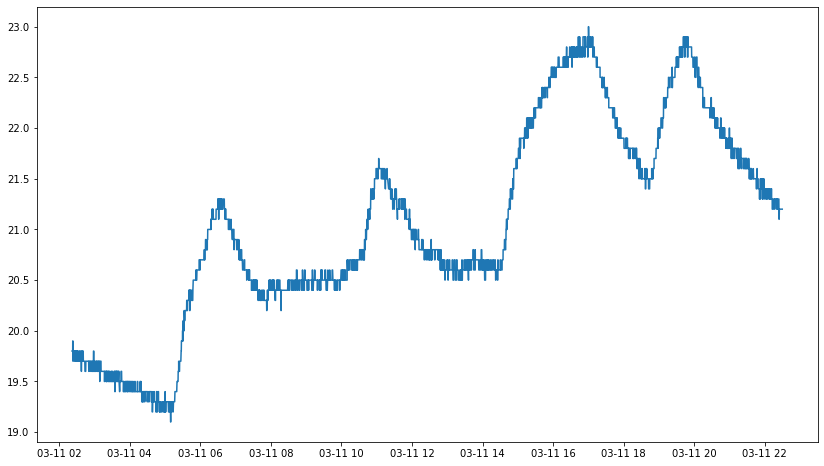

In [56]:
height=8
width=14
figsize=(width, height)

df_plot = df_temp_pivot['sensor.xiaomi_salon_temperature']
last_time = df_plot.index[-1]
hours_to_plot = 24
xfmt = mdates.DateFormatter('%m/%d') # %m-

f, ax = plt.subplots(1, 1, figsize=(width, height))
ax.plot(df_plot)
#ax.xaxis.set_major_formatter(xfmt)
#ax.set_xlim(now-dt.timedelta(hours=hours_to_plot), now);

# pojedynczy wykres

In [57]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 6 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   domain               10436 non-null  object        
 1   entity_id            10436 non-null  object        
 2   state                10436 non-null  float64       
 3   last_changed         10436 non-null  datetime64[ns]
 4   attributes           10436 non-null  object        
 5   unit_of_measurement  10436 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 570.7+ KB


In [58]:
temp_airly = df_temp[ df_temp['entity_id'] == 'sensor.airly_temperature_2' ]
temp_airly.head()

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
370,sensor,sensor.airly_temperature_2,-3.0,2022-03-11 22:19:04.366536,"{""state_class"":""measurement"",""attribution"":""Da...",°C
783,sensor,sensor.airly_temperature_2,-2.9,2022-03-11 22:09:04.372101,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1277,sensor,sensor.airly_temperature_2,-2.8,2022-03-11 21:59:04.388201,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1530,sensor,sensor.airly_temperature_2,-2.7,2022-03-11 21:54:04.026637,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1804,sensor,sensor.airly_temperature_2,-2.6,2022-03-11 21:49:02.944629,"{""state_class"":""measurement"",""attribution"":""Da...",°C


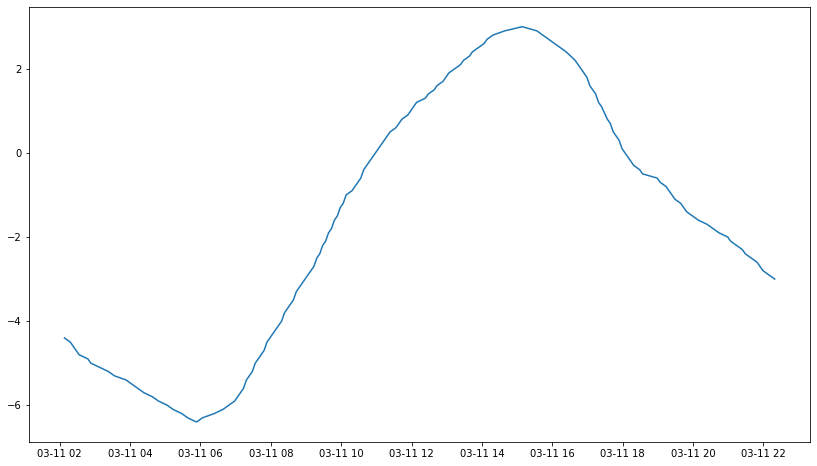

In [59]:
height=8
width=14
figsize=(width, height)

f, ax = plt.subplots(1, 1, figsize=(width, height))
ax.plot(temp_airly['last_changed'], temp_airly['state'])

# korelacje pomiędzy temeraturami

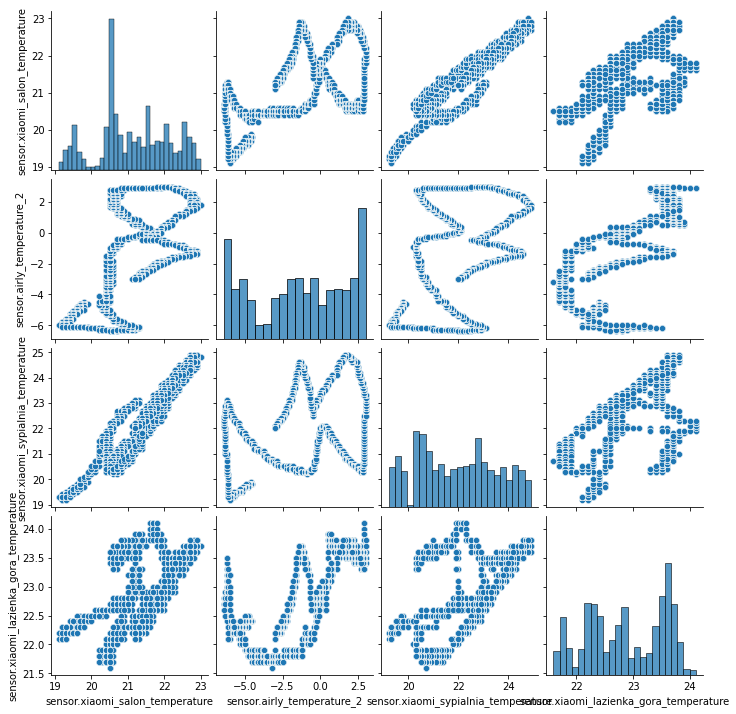

In [60]:
sns_plot = sns.pairplot(
    df_temp_pivot[['sensor.xiaomi_salon_temperature',
             'sensor.airly_temperature_2',
             'sensor.xiaomi_sypialnia_temperature', 
             'sensor.xiaomi_lazienka_gora_temperature']]);

sns_plot.savefig("pairplot.png")

# Prophet - prognozowanie temperatury na podstawie sensora airly

In [61]:
temp_airly.head()

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
370,sensor,sensor.airly_temperature_2,-3.0,2022-03-11 22:19:04.366536,"{""state_class"":""measurement"",""attribution"":""Da...",°C
783,sensor,sensor.airly_temperature_2,-2.9,2022-03-11 22:09:04.372101,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1277,sensor,sensor.airly_temperature_2,-2.8,2022-03-11 21:59:04.388201,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1530,sensor,sensor.airly_temperature_2,-2.7,2022-03-11 21:54:04.026637,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1804,sensor,sensor.airly_temperature_2,-2.6,2022-03-11 21:49:02.944629,"{""state_class"":""measurement"",""attribution"":""Da...",°C


In [62]:
temp_airly.tail()

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
48673,sensor,sensor.airly_temperature_2,-4.8,2022-03-11 02:33:01.357717,"{""state_class"":""measurement"",""attribution"":""Da...",°C
48927,sensor,sensor.airly_temperature_2,-4.7,2022-03-11 02:28:01.373227,"{""state_class"":""measurement"",""attribution"":""Da...",°C
49200,sensor,sensor.airly_temperature_2,-4.6,2022-03-11 02:23:01.643438,"{""state_class"":""measurement"",""attribution"":""Da...",°C
49445,sensor,sensor.airly_temperature_2,-4.5,2022-03-11 02:18:01.383802,"{""state_class"":""measurement"",""attribution"":""Da...",°C
49943,sensor,sensor.airly_temperature_2,-4.4,2022-03-11 02:08:01.404624,"{""state_class"":""measurement"",""attribution"":""Da...",°C


In [63]:
df_airly = temp_airly.copy()
df_airly.head()

,domain,entity_id,state,last_changed,attributes,unit_of_measurement
370,sensor,sensor.airly_temperature_2,-3.0,2022-03-11 22:19:04.366536,"{""state_class"":""measurement"",""attribution"":""Da...",°C
783,sensor,sensor.airly_temperature_2,-2.9,2022-03-11 22:09:04.372101,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1277,sensor,sensor.airly_temperature_2,-2.8,2022-03-11 21:59:04.388201,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1530,sensor,sensor.airly_temperature_2,-2.7,2022-03-11 21:54:04.026637,"{""state_class"":""measurement"",""attribution"":""Da...",°C
1804,sensor,sensor.airly_temperature_2,-2.6,2022-03-11 21:49:02.944629,"{""state_class"":""measurement"",""attribution"":""Da...",°C


In [64]:
columns = ['last_changed', 'state']

In [65]:
new_df = df_airly[columns]

In [66]:
new_df

,last_changed,state
370,2022-03-11 22:19:04.366536,-3.0
783,2022-03-11 22:09:04.372101,-2.9
1277,2022-03-11 21:59:04.388201,-2.8
1530,2022-03-11 21:54:04.026637,-2.7
1804,2022-03-11 21:49:02.944629,-2.6
...,...,...
48673,2022-03-11 02:33:01.357717,-4.8
48927,2022-03-11 02:28:01.373227,-4.7
49200,2022-03-11 02:23:01.643438,-4.6
49445,2022-03-11 02:18:01.383802,-4.5


In [67]:
new_df.columns = ['ds','y']

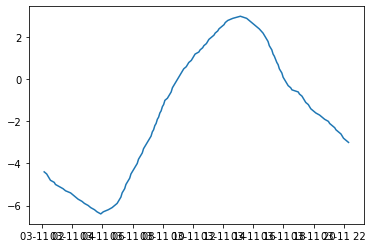

In [68]:
plt.plot(new_df['ds'], new_df['y'])

In [69]:
m = Prophet()
m.fit(new_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -23.3376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       87.9505     0.0345487       73.3036           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       103.501   0.000924946       71.6089   1.146e-05       0.001      258  LS failed, Hessian reset 
     199       103.555   9.55299e-06       81.0813           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       103.556   2.01864e-06       67.7544   2.412e-08       0.001      361  LS failed, Hessian reset 
     251       103.556   5.23304e-09       79.2013      0.7036      0.7036      403   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [70]:
future = m.make_future_dataframe(periods=365)

In [71]:
future.head()

,ds
0,2022-03-11 02:08:01.404624
1,2022-03-11 02:18:01.383802
2,2022-03-11 02:23:01.643438
3,2022-03-11 02:28:01.373227
4,2022-03-11 02:33:01.357717


In [72]:
future.tail()

,ds
515,2023-03-07 22:19:04.366536
516,2023-03-08 22:19:04.366536
517,2023-03-09 22:19:04.366536
518,2023-03-10 22:19:04.366536
519,2023-03-11 22:19:04.366536


In [73]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
515,2023-03-07 22:19:04.366536,-2525.576760,-44385.058029,38510.482617
516,2023-03-08 22:19:04.366536,-2532.569565,-44546.008121,38810.368424
517,2023-03-09 22:19:04.366536,-2539.562370,-44709.416982,39093.933293
518,2023-03-10 22:19:04.366536,-2546.555175,-44876.438883,39268.385694
519,2023-03-11 22:19:04.366536,-2553.547980,-45075.262682,39386.953344


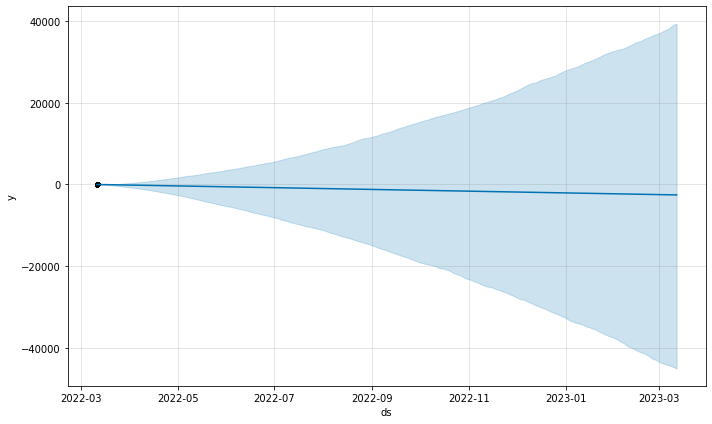

In [74]:
fig1 = m.plot(forecast)

In [75]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-11 02:08:01.404624,-7.320829,-9.074761,-5.671980,-7.320829,-7.320829,0.0,0.0,0.0,0.0,0.0,0.0,-7.320829
1,2022-03-11 02:18:01.383802,-7.195257,-8.880003,-5.558922,-7.195257,-7.195257,0.0,0.0,0.0,0.0,0.0,0.0,-7.195257
2,2022-03-11 02:23:01.643438,-7.132415,-8.775878,-5.467202,-7.132415,-7.132415,0.0,0.0,0.0,0.0,0.0,0.0,-7.132415
3,2022-03-11 02:28:01.373227,-7.069684,-8.778125,-5.457038,-7.069684,-7.069684,0.0,0.0,0.0,0.0,0.0,0.0,-7.069684
4,2022-03-11 02:33:01.357717,-7.006899,-8.640975,-5.351881,-7.006899,-7.006899,0.0,0.0,0.0,0.0,0.0,0.0,-7.006899


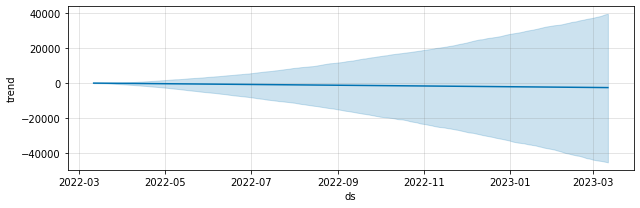

In [76]:
fig2 = m.plot_components(forecast)

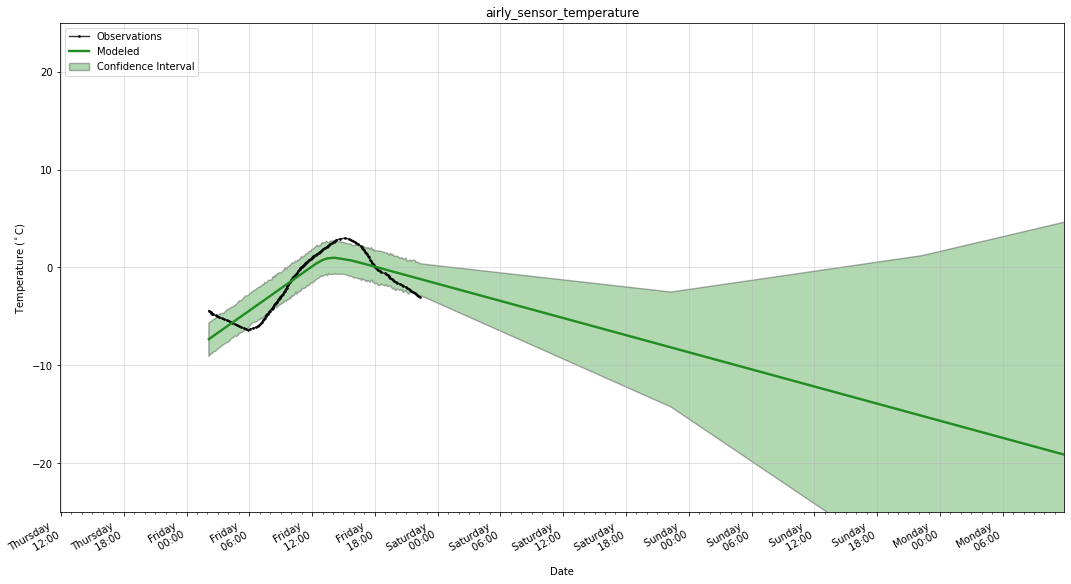

In [84]:
# pożyczone ze Stocker'a
height=10
width=18

now = dt.datetime.now()
hours_to_plot = 24*2

fig, ax = plt.subplots(1, 1, figsize=(width, height))

ax.plot(new_df['ds'], new_df['y'], 'ko-', linewidth = 1.4, alpha = 0.8, ms = 1.8, label = 'Observations')
    
ax.plot(forecast['ds'], forecast['yhat'], 'forestgreen',linewidth = 2.4, label = 'Modeled');

# Plot the uncertainty interval as ribbon
ax.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'], forecast['yhat_lower'], alpha = 0.3, 
facecolor = 'g', edgecolor = 'k', linewidth = 1.4, label = 'Confidence Interval')

# Plot formatting
ax.set_xlim(now-dt.timedelta(hours=hours_to_plot), now+dt.timedelta(hours=hours_to_plot))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%A \n %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.set_ylim(-25.0, 25.0)

plt.legend(loc = 2, prop={'size': 10}); plt.xlabel('Date'); plt.ylabel('Temperature ($^\circ$C)');
plt.grid(linewidth=0.6, alpha = 0.6)
title = 'airly_sensor_temperature'
plt.title(title);
plt.savefig('airly_sensor_temperature_precition.jpg')
fig.autofmt_xdate()
plt.show()

In [78]:
# Python
import json
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model


In [79]:
with open('serialized_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

/home/jarek/python_venvs/home_assistant_venv/lib/python3.8/site-packages/prophet/serialize.py:136: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))
